# Get the Dataset

In [ ]:
!wget https://www.dropbox.com/s/tvjx399oq69k1rs/LungCancer_Dataset_ML.zip
!wget https://www.dropbox.com/s/jch0f4cs1y168cq/GLCM_FEATURE.py

--2022-05-24 02:37:33--  https://www.dropbox.com/s/tvjx399oq69k1rs/LungCancer_Dataset_ML.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/tvjx399oq69k1rs/LungCancer_Dataset_ML.zip [following]
--2022-05-24 02:37:34--  https://www.dropbox.com/s/raw/tvjx399oq69k1rs/LungCancer_Dataset_ML.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc269bdd11ef31902697e0d9d40b.dl.dropboxusercontent.com/cd/0/inline/Bl0EWGiz09osQ9yqd8V2AMNdES4sLKqyJ-kTV6ygIzeYCjZvo1-jI0gyKfNxq3qY1GlEqBrBTrQ5UpbZkEyv4JN6ksqsdtYVmdgIbEbBk5DwUIt4SBNlK4YN5Z9u2_HCYR-cLdStkqZIyht6D46jH_6gn7Ja_xErKiZWZiB9_Vq9zQ/file# [following]
--2022-05-24 02:37:34--  https://uc269bdd11ef31902697e0d9d40b.dl.dropboxusercontent.com/cd/0/inline/Bl0EWGiz09osQ9yqd8V2AMNdES4

# Uzip the file

In [ ]:
!unzip LungCancer_Dataset_ML.zip

Archive:  LungCancer_Dataset_ML.zip
   creating: LungCancer_Dataset_ML/
   creating: LungCancer_Dataset_ML/Trainn/
   creating: LungCancer_Dataset_ML/Trainn/LungCancer/
  inflating: LungCancer_Dataset_ML/Trainn/LungCancer/a (1).png  
  inflating: LungCancer_Dataset_ML/Trainn/LungCancer/a (10).png  
  inflating: LungCancer_Dataset_ML/Trainn/LungCancer/a (11).png  
  inflating: LungCancer_Dataset_ML/Trainn/LungCancer/a (12).png  
  inflating: LungCancer_Dataset_ML/Trainn/LungCancer/a (13).png  
  inflating: LungCancer_Dataset_ML/Trainn/LungCancer/a (14).png  
  inflating: LungCancer_Dataset_ML/Trainn/LungCancer/a (15).png  
  inflating: LungCancer_Dataset_ML/Trainn/LungCancer/a (16).png  
  inflating: LungCancer_Dataset_ML/Trainn/LungCancer/a (17).png  
  inflating: LungCancer_Dataset_ML/Trainn/LungCancer/a (18).png  
  inflating: LungCancer_Dataset_ML/Trainn/LungCancer/a (19).png  
  inflating: LungCancer_Dataset_ML/Trainn/LungCancer/a (2).png  
  inflating: LungCancer_Dataset_ML/Trainn

# import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import skimage
import cv2 
import os
import glob
import pywt
import GLCM_FEATURE

# dataset path

In [ ]:
print(os.listdir("./LungCancer_Dataset_ML/"))

['Trainn']


In [ ]:
def main():
    pass

if __name__ == '__main__':
    main()


    #glcm_mean = GLCM_FEATURE.GLCM_FEATURE_mean(img_data[0])

    #plt.imshow(glcm_mean)
    #plt.tight_layout()
    #plt.show()

# null list -- to store the image data

In [ ]:
img_data = []
predict_labels = [] 
img_ext = ['png']
img_data_1 = []
xs =[]
img_feat=[]
inp_image = []

In [ ]:
print(os.listdir("./LungCancer_Dataset_ML/Trainn"))

['Normal', 'LungCancer']


# for Disease part

In [ ]:
import statistics

# for disease
files_name = []
image_dir = './LungCancer_Dataset_ML/Trainn/LungCancer/'
[files_name.extend(glob.glob(image_dir + '*.' + e)) for e in img_ext]
display(files_name)
for file in files_name: 
    img_data_read = cv2.imread(file) 
    gray = cv2.cvtColor(img_data_read, cv2.COLOR_BGR2GRAY) 
      
    ret, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV +
                                cv2.THRESH_OTSU) 
    # otsu_threshold, image_result = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU )
    lw = pywt.dwt2(thresh, 'db4', mode='per') 
    LL, (LH, HL, HH) = lw

  
img_data.extend([LL for file in files_name])
inp_image.extend([img_data_read for file in files_name])
img = LL
mean1 = (GLCM_FEATURE.GLCM_FEATURE_mean(img))
meann = statistics.mean([max(i) for i in mean1])

std1 = (GLCM_FEATURE.GLCM_FEATURE_std(img))
std = statistics.mean([max(i) for i in std1])

cont1 = (GLCM_FEATURE.GLCM_FEATURE_contrast(img))
cont = statistics.mean([max(i) for i in cont1])

diss1 = (GLCM_FEATURE.GLCM_FEATURE_dissimilarity(img))
diss = statistics.mean([max(i) for i in diss1])

homo1 = (GLCM_FEATURE.GLCM_FEATURE_homogeneity(img))
homo = statistics.mean([max(i) for i in homo1])

asm1, ene1 = (GLCM_FEATURE.GLCM_FEATURE_ASM(img))
asm = statistics.mean([max(i) for i in asm1])
ene = statistics.mean([max(i) for i in ene1])

ma1 = (GLCM_FEATURE.GLCM_FEATURE_max(img))
ma = statistics.mean([max(i) for i in ma1])

img_feat1 = [meann ,std,cont,diss,homo,asm,ene,ma]
img_feat.extend([img_feat1 for file in files_name])
# display(img_data)
predict_labels.extend(["Disease-LungCancer" for file in files_name])
display(predict_labels)

['./LungCancer_Dataset_ML/Trainn/LungCancer/s (21).png',
 './LungCancer_Dataset_ML/Trainn/LungCancer/l (19).png',
 './LungCancer_Dataset_ML/Trainn/LungCancer/s (41).png',
 './LungCancer_Dataset_ML/Trainn/LungCancer/s (42).png',
 './LungCancer_Dataset_ML/Trainn/LungCancer/l (12).png',
 './LungCancer_Dataset_ML/Trainn/LungCancer/l (11).png',
 './LungCancer_Dataset_ML/Trainn/LungCancer/a (21).png',
 './LungCancer_Dataset_ML/Trainn/LungCancer/s (59).png',
 './LungCancer_Dataset_ML/Trainn/LungCancer/s (3).png',
 './LungCancer_Dataset_ML/Trainn/LungCancer/a (25).png',
 './LungCancer_Dataset_ML/Trainn/LungCancer/s (2).png',
 './LungCancer_Dataset_ML/Trainn/LungCancer/a (32).png',
 './LungCancer_Dataset_ML/Trainn/LungCancer/s (27).png',
 './LungCancer_Dataset_ML/Trainn/LungCancer/l (38).png',
 './LungCancer_Dataset_ML/Trainn/LungCancer/l (39).png',
 './LungCancer_Dataset_ML/Trainn/LungCancer/a (35).png',
 './LungCancer_Dataset_ML/Trainn/LungCancer/a (16).png',
 './LungCancer_Dataset_ML/Trainn/

['Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-L

In [ ]:
img_data


[array([[510., 510., 510., ..., 510., 510., 510.],
        [510., 510., 510., ..., 510., 510., 510.],
        [510., 510., 510., ..., 510., 510., 510.],
        ...,
        [510., 510., 510., ..., 510., 510., 510.],
        [510., 510., 510., ..., 510., 510., 510.],
        [510., 510., 510., ..., 510., 510., 510.]]),
 array([[510., 510., 510., ..., 510., 510., 510.],
        [510., 510., 510., ..., 510., 510., 510.],
        [510., 510., 510., ..., 510., 510., 510.],
        ...,
        [510., 510., 510., ..., 510., 510., 510.],
        [510., 510., 510., ..., 510., 510., 510.],
        [510., 510., 510., ..., 510., 510., 510.]]),
 array([[510., 510., 510., ..., 510., 510., 510.],
        [510., 510., 510., ..., 510., 510., 510.],
        [510., 510., 510., ..., 510., 510., 510.],
        ...,
        [510., 510., 510., ..., 510., 510., 510.],
        [510., 510., 510., ..., 510., 510., 510.],
        [510., 510., 510., ..., 510., 510., 510.]]),
 array([[510., 510., 510., ..., 510.,

# for Healthy Image Part

In [ ]:
# for healthy 
files_name = []
image_dir = './LungCancer_Dataset_ML/Trainn/Normal/'
[files_name.extend(glob.glob(image_dir + '*.' + e)) for e in img_ext]
display(files_name)
for file in files_name: 
    img_data_read = cv2.imread(file) 
    gray = cv2.cvtColor(img_data_read, cv2.COLOR_BGR2GRAY) 
      
    ret, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV +
                                cv2.THRESH_OTSU) 
    lw = pywt.dwt2(thresh, 'db4', mode='per') 
    LL, (LH, HL, HH) = lw

 
img_data.extend([LL for file in files_name])
inp_image.extend([img_data_read for file in files_name])

img = LL
mean1 = (GLCM_FEATURE.GLCM_FEATURE_mean(img))
meann = statistics.mean([max(i) for i in mean1])

std1 = (GLCM_FEATURE.GLCM_FEATURE_std(img))
std = statistics.mean([max(i) for i in std1])

cont1 = (GLCM_FEATURE.GLCM_FEATURE_contrast(img))
cont = statistics.mean([max(i) for i in cont1])

diss1 = (GLCM_FEATURE.GLCM_FEATURE_dissimilarity(img))
diss = statistics.mean([max(i) for i in diss1])

homo1 = (GLCM_FEATURE.GLCM_FEATURE_homogeneity(img))
homo = statistics.mean([max(i) for i in homo1])

asm1, ene1 = (GLCM_FEATURE.GLCM_FEATURE_ASM(img))
asm = statistics.mean([max(i) for i in asm1])
ene = statistics.mean([max(i) for i in ene1])

ma1 = (GLCM_FEATURE.GLCM_FEATURE_max(img))
ma = statistics.mean([max(i) for i in ma1])

img_feat1a = [meann ,std,cont,diss,homo,asm,ene,ma]
img_feat.extend([img_feat1a for file in files_name])
# display(img_data)
predict_labels.extend(["Healthy-Normal" for file in files_name])
display(predict_labels)

['./LungCancer_Dataset_ML/Trainn/Normal/6.png',
 './LungCancer_Dataset_ML/Trainn/Normal/20 (2) - Copy.png',
 './LungCancer_Dataset_ML/Trainn/Normal/4 - Copy (2).png',
 './LungCancer_Dataset_ML/Trainn/Normal/12 - Copy.png',
 './LungCancer_Dataset_ML/Trainn/Normal/19 - Copy - Copy.png',
 './LungCancer_Dataset_ML/Trainn/Normal/17 - Copy.png',
 './LungCancer_Dataset_ML/Trainn/Normal/18 - Copy (3).png',
 './LungCancer_Dataset_ML/Trainn/Normal/6 - Copy.png',
 './LungCancer_Dataset_ML/Trainn/Normal/18 (2) - Copy.png',
 './LungCancer_Dataset_ML/Trainn/Normal/8 - Copy (2).png',
 './LungCancer_Dataset_ML/Trainn/Normal/n7 (2) - Copy.png',
 './LungCancer_Dataset_ML/Trainn/Normal/16 - Copy (2) - Copy.png',
 './LungCancer_Dataset_ML/Trainn/Normal/17 - Copy (2) - Copy.png',
 './LungCancer_Dataset_ML/Trainn/Normal/17 - Copy (2).png',
 './LungCancer_Dataset_ML/Trainn/Normal/20 - Copy.png',
 './LungCancer_Dataset_ML/Trainn/Normal/2 - Copy (2) - Copy.png',
 './LungCancer_Dataset_ML/Trainn/Normal/11 - Cop

['Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-LungCancer',
 'Disease-L

In [ ]:
df = pd.DataFrame(img_feat, columns = ['mean','std','contrast','dissimilarity','homogenity','ASM','energy','max'])
df.shape

(301, 8)

# Count the Target/Prediction Class

In [ ]:
print(predict_labels.count('Disease-LungCancer'))
print(predict_labels.count('Healthy-Normal'))

165
136


In [ ]:
""""
# for healthy leaf
files_name = []
image_dir = './Image_Database_1/Trainn/Healthy/'
[files_name.extend(glob.glob(image_dir + '*.' + e)) for e in img_ext]
display(files_name)

img_data.extend([cv2.imread(file) for file in files_name])

# display(img_data)

predict_labels.extend(["Healthy" for file in files_name])
display(predict_labels)

"""

'"\n# for healthy leaf\nfiles_name = []\nimage_dir = \'./Image_Database_1/Trainn/Healthy/\'\n[files_name.extend(glob.glob(image_dir + \'*.\' + e)) for e in img_ext]\ndisplay(files_name)\n\nimg_data.extend([cv2.imread(file) for file in files_name])\n\n# display(img_data)\n\npredict_labels.extend(["Healthy" for file in files_name])\ndisplay(predict_labels)\n\n'

In [ ]:
len(img_data)

301

# resize the data (to default size)

# 2^8 = 256  --- uint8 format -- unsigned integer

In [ ]:
img_size = (256,256)
img_data_new = np.array([cv2.resize(i, img_size, interpolation = cv2.INTER_AREA) for i in img_data])
display(img_data_new)

array([[[510.       , 510.       , 509.9999848, ..., 510.       ,
         510.0000152, 510.       ],
        [510.0000038, 510.0000038, 509.9999886, ..., 510.0000038,
         510.000019 , 510.0000038],
        [510.       , 510.       , 509.9999848, ..., 510.       ,
         510.0000152, 510.       ],
        ...,
        [510.       , 510.       , 509.9999848, ..., 510.       ,
         510.0000152, 510.       ],
        [510.       , 510.       , 509.9999848, ..., 510.       ,
         510.0000152, 510.       ],
        [510.       , 510.       , 509.9999848, ..., 510.       ,
         510.0000152, 510.       ]],

       [[510.       , 510.       , 509.9999848, ..., 510.       ,
         510.0000152, 510.       ],
        [510.0000038, 510.0000038, 509.9999886, ..., 510.0000038,
         510.000019 , 510.0000038],
        [510.       , 510.       , 509.9999848, ..., 510.       ,
         510.0000152, 510.       ],
        ...,
        [510.       , 510.       , 509.9999848, ..., 5

In [ ]:
img_data_new.shape

(301, 256, 256)

# creating a dataframe for Prediction class label





In [ ]:
prediction_class_label = pd.DataFrame(predict_labels,columns = ['target_class'])
prediction_class_label

,target_class
0,Disease-LungCancer
1,Disease-LungCancer
2,Disease-LungCancer
3,Disease-LungCancer
4,Disease-LungCancer
...,...
296,Healthy-Normal
297,Healthy-Normal
298,Healthy-Normal
299,Healthy-Normal


# Categorical code conversion

In [ ]:
target_veriable = prediction_class_label.copy()
prediction_class_label['target_class'] = prediction_class_label['target_class'].astype('category') 
prediction_class_label['target_class'] = prediction_class_label['target_class'].cat.codes
prediction_class_label['target_class']

0      0
1      0
2      0
3      0
4      0
      ..
296    1
297    1
298    1
299    1
300    1
Name: target_class, Length: 301, dtype: int8

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Xa_1 = df
Target_Class = prediction_class_label


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xa_1, Target_Class, random_state=42 , test_size=0.25,shuffle =  True)
display("for training")
print(X_train.shape, y_train.shape)
display("for testing")
print(X_test.shape, y_test.shape)

'for training'

(225, 8) (225, 1)


'for testing'

(76, 8) (76, 1)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier as SDC
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score

# creating an empty list to save the results (classifier)

In [ ]:
model_names = []
feature_counts = []
model_acc_scores = []
model_f1_scores = []

# calling classifier

In [ ]:
# Support vector
svc_model_1 = SVC(random_state=5,class_weight='balanced',kernel='rbf',decision_function_shape='ovr')
svc_model_1.fit(X_train, y_train)
svc_model_1_y_hat = svc_model_1.predict(X_test)
model_names.append('svc_model_1')
feature_counts.append(X_train.shape[1])
model_acc_scores.append(accuracy_score(y_test, svc_model_1_y_hat,normalize=bool))
model_f1_scores.append(f1_score(y_test, svc_model_1_y_hat, average='micro'))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# RFC -- Model 1
rfc_model_1 = RFC(random_state=42,class_weight='balanced')
rfc_model_1.fit(X_train, y_train)
rfc_model_1_y_hat = rfc_model_1.predict(X_test)
model_names.append('RFC_model_1')
feature_counts.append(X_train.shape[1])
model_acc_scores.append(accuracy_score(y_test, rfc_model_1_y_hat))
model_f1_scores.append(f1_score(y_test, rfc_model_1_y_hat, average='micro'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_model_eval = pd.DataFrame({'model': model_names, 'feature_count': feature_counts, 
                                    'acc': model_acc_scores,'f1': model_f1_scores})
df_model_eval

,model,feature_count,acc,f1
0,svc_model_1,8,0.592105,0.592105
1,RFC_model_1,8,1.000000,1.000000


# **Multilayer Perceptrons model (ANN)**

In [ ]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier
mlp_mdl = MLPClassifier(alpha=0.001,solver='sgd',random_state=42, max_iter=100,activation='relu',hidden_layer_sizes=([100,100,100]))# alpha=0.001
mlp_mdl.fit(X_train, y_train) # train the model

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100], max_iter=100,
              random_state=42, solver='sgd')

In [ ]:
#predicting the target value from the model for the samples
y_test_mlp = mlp_mdl.predict(X_test)
y_train_mlp = mlp_mdl.predict(X_train)

#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: training Data Accuracy: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: test Data Accuracy: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: training Data Accuracy: 0.533
Multilayer Perceptrons: test Data Accuracy: 0.592


In [ ]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [ ]:
storeResults('Multilayer Perceptrons Result', acc_train_mlp, acc_test_mlp)
#
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Multilayer Perceptrons Result,0.533,0.592


# to View the features like as image

In [ ]:
files_name1 = []
image_dir = './LungCancer_Dataset_ML/Trainn/LungCancer/'
image_dir1 = './LungCancer_Dataset_ML/Trainn/Normal/'
[files_name1.extend(glob.glob(image_dir + '*.' + e)) for e in img_ext]
[files_name1.extend(glob.glob(image_dir1 + '*.' + e)) for e in img_ext]
files_name1

['./LungCancer_Dataset_ML/Trainn/LungCancer/s (21).png',
 './LungCancer_Dataset_ML/Trainn/LungCancer/l (19).png',
 './LungCancer_Dataset_ML/Trainn/LungCancer/s (41).png',
 './LungCancer_Dataset_ML/Trainn/LungCancer/s (42).png',
 './LungCancer_Dataset_ML/Trainn/LungCancer/l (12).png',
 './LungCancer_Dataset_ML/Trainn/LungCancer/l (11).png',
 './LungCancer_Dataset_ML/Trainn/LungCancer/a (21).png',
 './LungCancer_Dataset_ML/Trainn/LungCancer/s (59).png',
 './LungCancer_Dataset_ML/Trainn/LungCancer/s (3).png',
 './LungCancer_Dataset_ML/Trainn/LungCancer/a (25).png',
 './LungCancer_Dataset_ML/Trainn/LungCancer/s (2).png',
 './LungCancer_Dataset_ML/Trainn/LungCancer/a (32).png',
 './LungCancer_Dataset_ML/Trainn/LungCancer/s (27).png',
 './LungCancer_Dataset_ML/Trainn/LungCancer/l (38).png',
 './LungCancer_Dataset_ML/Trainn/LungCancer/l (39).png',
 './LungCancer_Dataset_ML/Trainn/LungCancer/a (35).png',
 './LungCancer_Dataset_ML/Trainn/LungCancer/a (16).png',
 './LungCancer_Dataset_ML/Trainn/

In [ ]:
files_name1[1]

'./LungCancer_Dataset_ML/Trainn/LungCancer/l (19).png'

In [ ]:
def view_features(files_name1,user_input):
        input_image = cv2.imread(files_name1[user_input]) 
        gray1 = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY) 
          
        ret1, thresh1 = cv2.threshold(gray1, 120, 255, cv2.THRESH_BINARY_INV +
                                    cv2.THRESH_OTSU) 
        # otsu_threshold, image_result = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU )
        lw1 = pywt.dwt2(thresh1, 'db4', mode='per') 
        LL1, (LH1, HL1, HH1) = lw1  
        imga = LL1;
        mean1A = (GLCM_FEATURE.GLCM_FEATURE_mean(imga))
        std1A = (GLCM_FEATURE.GLCM_FEATURE_std(imga))
        cont1A = (GLCM_FEATURE.GLCM_FEATURE_contrast(imga))
        diss1A = (GLCM_FEATURE.GLCM_FEATURE_dissimilarity(imga))
        homo1A = (GLCM_FEATURE.GLCM_FEATURE_homogeneity(imga))
        asm1A, ene1A = (GLCM_FEATURE.GLCM_FEATURE_ASM(imga))
        ma1A = (GLCM_FEATURE.GLCM_FEATURE_max(imga))

        plt.figure(figsize=(15,6.5))
        fs = 15
        plt.subplot(3,4,1)
        plt.tick_params(labelbottom=False, labelleft=False)
        plt.imshow(input_image)
        plt.title('Original Image', fontsize=fs)

        plt.subplot(3,4,2)
        plt.tick_params(labelbottom=False, labelleft=False)
        plt.imshow(gray1)
        plt.title('Grayscale Image', fontsize=fs)

        plt.subplot(3,4,3)
        plt.tick_params(labelbottom=False, labelleft=False)
        plt.imshow(thresh1)
        plt.title('Binary Image', fontsize=fs)

        plt.subplot(3,4,4)
        plt.tick_params(labelbottom=False, labelleft=False)
        plt.imshow(LL1)
        plt.title('Approximation Coefficient from DWT', fontsize=fs)

        plt.subplot(3,4,5)
        plt.tick_params(labelbottom=False, labelleft=False)
        plt.imshow(mean1A)
        plt.title('Mean', fontsize=fs)

        plt.subplot(3,4,6)
        plt.tick_params(labelbottom=False, labelleft=False)
        plt.imshow(std1A)
        plt.title('Std Deviation ', fontsize=fs)

        plt.subplot(3,4,7)
        plt.tick_params(labelbottom=False, labelleft=False)
        plt.imshow(cont1A)
        plt.title('contrast', fontsize=fs)

        plt.subplot(3,4,8)
        plt.tick_params(labelbottom=False, labelleft=False)
        plt.imshow(diss1A)
        plt.title('dis-similarity', fontsize=fs)

        plt.subplot(3,4,9)
        plt.tick_params(labelbottom=False, labelleft=False)
        plt.imshow(homo1A)
        plt.title('Homogeneity', fontsize=fs)

        plt.subplot(3,4,10)
        plt.tick_params(labelbottom=False, labelleft=False)
        plt.imshow(asm1A)
        plt.title('ASM-Angular Second Moment', fontsize=fs)

        plt.subplot(3,4,11)
        plt.tick_params(labelbottom=False, labelleft=False)
        plt.imshow(ene1A)
        plt.title('Energy', fontsize=fs)

        plt.subplot(3,4,12)
        plt.tick_params(labelbottom=False, labelleft=False)
        plt.imshow(ma1A)
        plt.title('Max', fontsize=fs)

        plt.tight_layout(pad=0.5)
        plt.savefig('output.jpg')
        plt.show()


Enter the number between 0 to 300 : 287


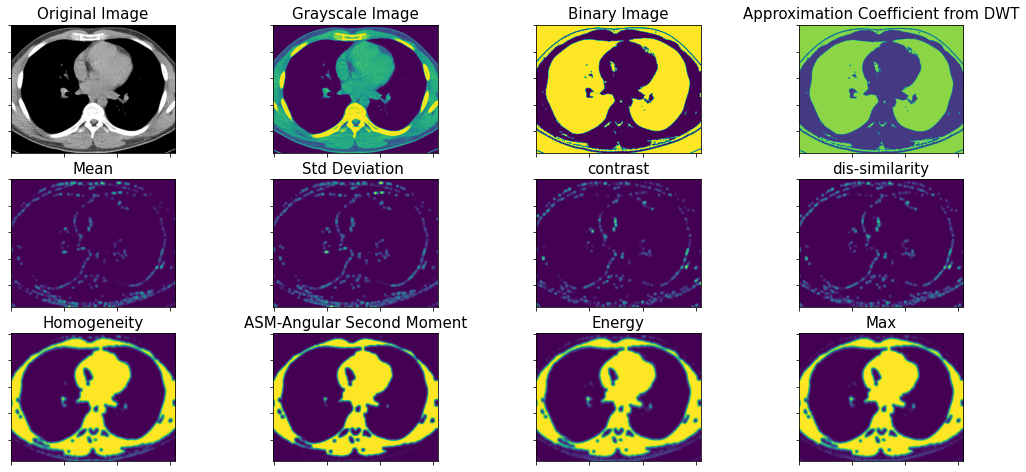

In [ ]:
user_input = int(input("Enter the number between 0 to 300 : "))
view_features(files_name1,user_input)


In [ ]:
user_input

300